In [1]:
import matplotlib.pyplot as plt
import numpy as np
import hist
from hist import Hist
import awkward as ak

In [2]:
h = Hist(hist.axis.Regular(bins=50, start=0, stop=1, name="x"),
         hist.axis.Regular(bins=50, start=0, stop=1, name="y"))
h_w = Hist(hist.axis.Regular(bins=50, start=0, stop=1, name="x"),
         hist.axis.Regular(bins=50, start=0, stop=1, name="y"))
h

Hist(
  Regular(50, 0, 1, name='x'),
  Regular(50, 0, 1, name='y'),
  storage=Double())

In [3]:
N = 1000
x = np.random.normal(0.5, 0.1, size=N)
y = np.random.normal(0.5, 0.05, size=N)
x,y

(array([0.50316668, 0.33318942, 0.74001991, 0.42786074, 0.56461918,
        0.53965514, 0.72796496, 0.44403639, 0.61638345, 0.50377641,
        0.51573074, 0.60014268, 0.41284568, 0.67597103, 0.53975441,
        0.55513785, 0.67267457, 0.54074484, 0.50212508, 0.34772152,
        0.48097465, 0.47834551, 0.36867219, 0.52294048, 0.6355171 ,
        0.5396456 , 0.36857289, 0.62747756, 0.40431956, 0.55660788,
        0.52144472, 0.5588612 , 0.51246686, 0.34136303, 0.3803473 ,
        0.47214013, 0.50700669, 0.50993145, 0.38104705, 0.52912344,
        0.4064955 , 0.42313938, 0.47989438, 0.61565825, 0.39867896,
        0.42752909, 0.49649754, 0.50318473, 0.49187619, 0.47855116,
        0.49887416, 0.51217322, 0.53753506, 0.63027912, 0.47341574,
        0.46761396, 0.41264217, 0.38692932, 0.66627967, 0.4659569 ,
        0.53568341, 0.48383755, 0.27253858, 0.50006754, 0.44277414,
        0.54736572, 0.55677209, 0.43994099, 0.3499019 , 0.49245962,
        0.48514736, 0.5006914 , 0.35712455, 0.48

In [4]:
h.fill(x,y)
h_w.fill(x,y, weight=1.1)

Hist(
  Regular(50, 0, 1, name='x'),
  Regular(50, 0, 1, name='y'),
  storage=Double()) # Sum: 1100.0

In [5]:
h_w.project('x').counts()

array([ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  1.1,
        2.2,  2.2,  5.5,  7.7, 15.4, 22. , 44. , 31.9, 39.6, 53.9, 75.9,
       73.7, 90.2, 80.3, 99. , 89.1, 83.6, 50.6, 48.4, 46.2, 44. , 27.5,
       15.4, 20.9, 12.1,  6.6,  2.2,  3.3,  3.3,  1.1,  0. ,  1.1,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ])

In [6]:
h[2,2] = 40
h

Hist(
  Regular(50, 0, 1, name='x'),
  Regular(50, 0, 1, name='y'),
  storage=Double()) # Sum: 1040.0

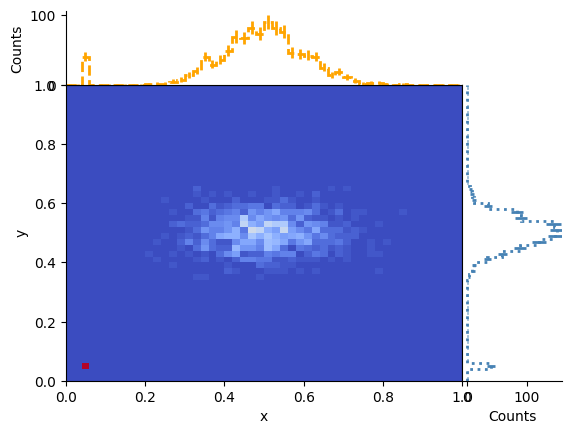

In [7]:
h.plot2d_full(
    main_cmap="coolwarm",
    top_ls="--",
    top_color="orange",
    top_lw=2,
    side_ls=":",
    side_lw=2,
    side_color="steelblue",
);

In [8]:
import inspect
import mplhep

ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x7fa447adac10>, cbar=<matplotlib.colorbar.Colorbar object at 0x7fa447b2f370>, text=[])

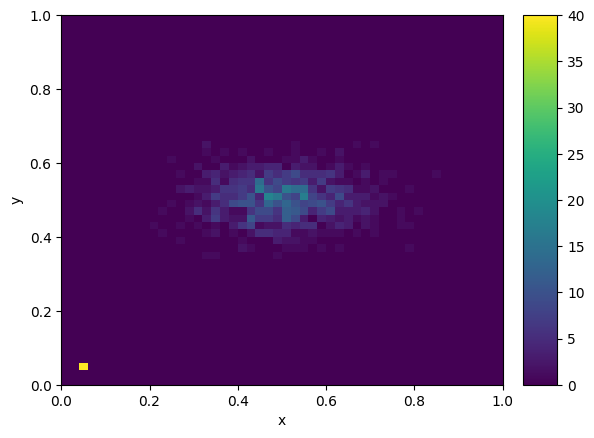

In [9]:
mplhep.hist2dplot(h)

In [10]:
h1 = h.project('x')
h2 = h.project('y')
h1

Hist(Regular(50, 0, 1, name='x'), storage=Double()) # Sum: 1040.0

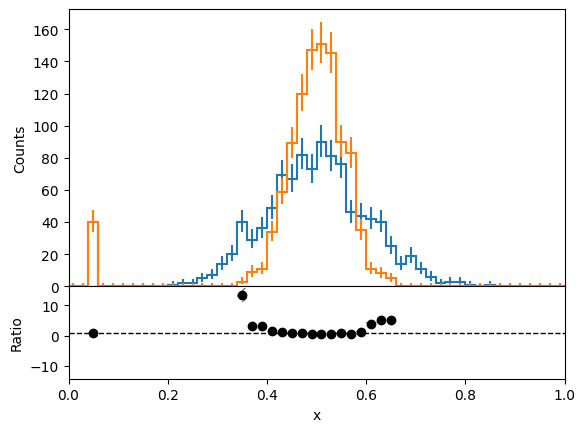

In [11]:
h1.plot_ratio(h2, rp_uncert_draw_type="bar", rp_uncertainty_type='poisson');

In [12]:
inspect.signature(h1.plot_ratio)

<Signature (other: 'hist.BaseHist | Callable[[np.typing.NDArray[Any]], np.typing.NDArray[Any]] | str', *, ax_dict: 'dict[str, matplotlib.axes.Axes] | None' = None, **kwargs: 'Any') -> 'tuple[MainAxisArtists, RatiolikeArtists]'>

In [13]:
h

Hist(
  Regular(50, 0, 1, name='x'),
  Regular(50, 0, 1, name='y'),
  storage=Double()) # Sum: 1040.0

In [14]:
h[{h.axes[1].name : sum}]

Hist(Regular(50, 0, 1, name='x'), storage=Double()) # Sum: 1040.0

In [15]:
h.axes[1].name

'y'

In [16]:
h.axes[1].label

'y'

In [17]:
h.fill(0.3, 0.3)

Hist(
  Regular(50, 0, 1, name='x'),
  Regular(50, 0, 1, name='y'),
  storage=Double()) # Sum: 1041.0

In [18]:
h.project('x').variances()

array([ 0.,  0., 40.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  2.,  2.,
        5.,  7., 15., 20., 40., 29., 36., 49., 69., 67., 82., 73., 90.,
       81., 76., 46., 44., 42., 40., 25., 14., 19., 11.,  6.,  2.,  3.,
        3.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [19]:
h_1d = Hist(hist.axis.Regular(bins=50, start=0, stop=1, name="x"),
            hist.axis.StrCategory(["nominal", "statUp", "statDown"], name="cat"))
h_1d

Hist(
  Regular(50, 0, 1, name='x'),
  StrCategory(['nominal', 'statUp', 'statDown'], name='cat'),
  storage=Double())

In [20]:
x = np.random.normal(0.5,0.1,1000)
w_up = 1.1*np.ones_like(x, dtype=float)
w_down = 0.9*np.ones_like(x, dtype=float)
h_1d.fill(x, cat="nominal")
#h_1d.fill(x, cat="statUp", weight=w_up)
#h_1d.fill(x, cat="statDown", weight=w_down)
#h_1d.fill(x)

Hist(
  Regular(50, 0, 1, name='x'),
  StrCategory(['nominal', 'statUp', 'statDown'], name='cat'),
  storage=Double()) # Sum: 1000.0

/work/mmarcheg/miniconda3/envs/pocket-coffea-blank/lib/python3.8/site-packages/mplhep/error_estimation.py:38: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  warnings.warn(
/work/mmarcheg/miniconda3/envs/pocket-coffea-blank/lib/python3.8/site-packages/mplhep/error_estimation.py:38: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  warnings.warn(


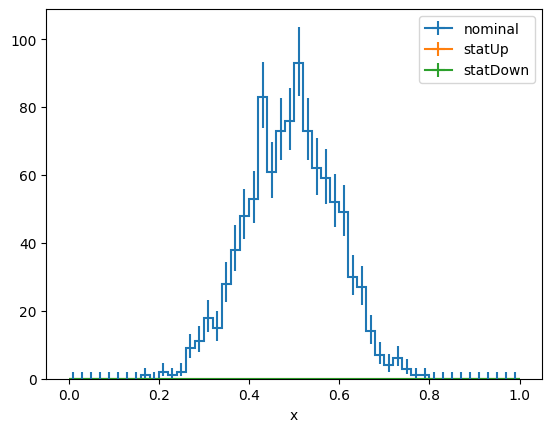

In [21]:
for cat in h_1d.axes[1]:
    h_1d[{'cat' : cat}].plot1d(label=cat)
plt.legend();

In [22]:
h = Hist(hist.axis.Regular(bins=4, start=0, stop=4, name="x"),
         hist.axis.Regular(bins=4, start=10, stop=14, name="y"),
         hist.axis.StrCategory(["nominal", "statUp", "statDown"], name="variation"))

In [23]:
x = np.random.normal(3,2,1000)
y = np.random.normal(12,1,1000)
h.fill(x, y, variation="nominal")
h_nom = h[{'variation' : 'nominal'}]
h_nom

Hist(
  Regular(4, 0, 4, name='x'),
  Regular(4, 10, 14, name='y'),
  storage=Double()) # Sum: 589.0 (1000.0 with flow)

In [24]:
stat = np.sqrt(h_nom.variances())
wUp = np.where(h_nom.values() == 0, 0, 1 + stat/h_nom.values())
wDown = np.where(h_nom.values() == 0, 0, 1 - stat/h_nom.values())
h_nom.values()

array([[ 8., 27., 43., 17.],
       [25., 47., 52., 12.],
       [25., 82., 58., 24.],
       [27., 48., 65., 29.]])

In [25]:
wUp*h_nom

array([[10.82842712, 32.19615242, 49.55743852, 21.12310563],
       [30.        , 53.8556546 , 59.21110255, 15.46410162],
       [30.        , 91.05538514, 65.61577311, 28.89897949],
       [32.19615242, 54.92820323, 73.06225775, 34.38516481]])

In [26]:
wDown*h_nom

array([[ 5.17157288, 21.80384758, 36.44256148, 12.87689437],
       [20.        , 40.1443454 , 44.78889745,  8.53589838],
       [20.        , 72.94461486, 50.38422689, 19.10102051],
       [21.80384758, 41.07179677, 56.93774225, 23.61483519]])

In [27]:
yv, xv = np.meshgrid(h_nom.axes['y'].centers, h_nom.axes['x'].centers)
yv, xv

(array([[10.5, 11.5, 12.5, 13.5],
        [10.5, 11.5, 12.5, 13.5],
        [10.5, 11.5, 12.5, 13.5],
        [10.5, 11.5, 12.5, 13.5]]),
 array([[0.5, 0.5, 0.5, 0.5],
        [1.5, 1.5, 1.5, 1.5],
        [2.5, 2.5, 2.5, 2.5],
        [3.5, 3.5, 3.5, 3.5]]))

In [28]:
h2 = Hist(hist.axis.Regular(bins=4, start=0, stop=4, name="x"),
         hist.axis.Regular(bins=4, start=10, stop=14, name="y"),
         hist.axis.StrCategory(["nominal", "statUp", "statDown"], name="variation"))

In [29]:
h1.values()

array([ 0.,  0., 40.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  2.,  2.,
        5.,  7., 14., 20., 40., 29., 36., 49., 69., 67., 82., 73., 90.,
       81., 76., 46., 44., 42., 40., 25., 14., 19., 11.,  6.,  2.,  3.,
        3.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [30]:
is_zero = np.where(h1.values() == 0)
is_zero

(array([ 0,  1,  3,  4,  5,  6,  7,  8,  9, 41, 43, 44, 45, 46, 47, 48, 49]),)

In [31]:
h1.values()[is_zero] = None

In [32]:
h1.values()

array([nan, nan, 40., nan, nan, nan, nan, nan, nan, nan,  1.,  2.,  2.,
        5.,  7., 14., 20., 40., 29., 36., 49., 69., 67., 82., 73., 90.,
       81., 76., 46., 44., 42., 40., 25., 14., 19., 11.,  6.,  2.,  3.,
        3.,  1., nan,  1., nan, nan, nan, nan, nan, nan, nan])

In [33]:
h1.values()[0] = None

In [34]:
ak.is_none(h1.values())

<Array [False, False, False, ... False, False] type='50 * bool'>

In [70]:
%%capture out

fig, ax = plt.subplots(1,1)
h2[{'variation' : 'nominal'}].plot2d(ax=ax);

In [71]:
dir(ax)

['ArtistList',
 '_AxesBase__clear',
 '_PROPERTIES_EXCLUDED_FROM_SET',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_text',
 '_adjustable',
 '_agg_filter',
 '_alias_map',
 '_alpha',
 '_anchor',
 '_animated',
 '_aspect',
 '_autotitlepos',
 '_axes',
 '_axes_class',
 '_axes_locator',
 '_axis_map',
 '_axis_names',
 '_axisbelow',
 '_box_aspect',
 '_callbacks',
 '_check_no_units',
 '_children',
 '_clipon',
 '_clippath',
 '_cm_set',
 '_colorbars',
 '_convert_dx',
 '_current_image',
 '_default_contains',
 '_deprecate_noninstance',
 '_errorevery_to_mask',
 '_facecolor',
 '_fill_between_x_or_y',
 '_frameon',
 '_fully_clipped_to_axes',
 '_

In [72]:
ax.properties()

{'adjustable': 'box',
 'agg_filter': None,
 'alpha': None,
 'anchor': 'C',
 'animated': False,
 'aspect': 'auto',
 'autoscale_on': False,
 'autoscalex_on': False,
 'autoscaley_on': False,
 'axes_locator': <mpl_toolkits.axes_grid1.axes_divider.AxesLocator at 0x7fa445841b20>,
 'axisbelow': 'line',
 'box_aspect': None,
 'children': [<matplotlib.collections.QuadMesh at 0x7fa445873d90>,
  Text(0.5, 1.0, ''),
  Text(0.0, 1.0, ''),
  Text(1.0, 1.0, ''),
 'clip_box': None,
 'clip_on': True,
 'clip_path': None,
 'data_ratio': 1.0,
 'default_bbox_extra_artists': [<matplotlib.spines.Spine at 0x7fa4458751c0>,
 'facecolor': (1.0, 1.0, 1.0, 1.0),
 'figure': <Figure size 640x480 with 2 Axes>,
 'frame_on': True,
 'gid': None,
 'gridspec': GridSpec(1, 1),
 'images': <a list of 0 AxesImage objects>,
 'in_layout': True,
 'label': '',
 'legend': None,
 'legend_handles_labels': ([], []),
 'lines': <a list of 0 Line2D objects>,
 'mouseover': False,
 'navigate': True,
 'navigate_mode': None,
 'path_effects':

In [73]:
cbar = ax.get_children()[-1]
cbar

In [74]:
list(filter(lambda x: 'aspect' in x, [dir(cbar)]))

['_PROPERTIES_EXCLUDED_FROM_SET',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_agg_filter',
 '_alias_map',
 '_alpha',
 '_animated',
 '_antialiased',
 '_aspect_ratio_correction',
 '_axes',
 '_callbacks',
 '_capstyle',
 '_clipon',
 '_clippath',
 '_cm_set',
 '_convert_units',
 '_convert_xy_units',
 '_dash_pattern',
 '_default_contains',
 '_draw_paths_with_artist_properties',
 '_edge_default',
 '_edgecolor',
 '_facecolor',
 '_fill',
 '_fully_clipped_to_axes',
 '_gid',
 '_hatch',
 '_hatch_color',
 '_height',
 '_in_layout',
 '_internal_update',
 '_joinstyle',
 '_label',
 '_linestyle',
 '_linewidth',
 '_mouseover',
 '_original_edgecolor',
 '_original_fac

In [75]:
cbar.set_width(0.01)

ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x7fa445873d90>, cbar=<matplotlib.colorbar.Colorbar object at 0x7fa445841880>, text=[])

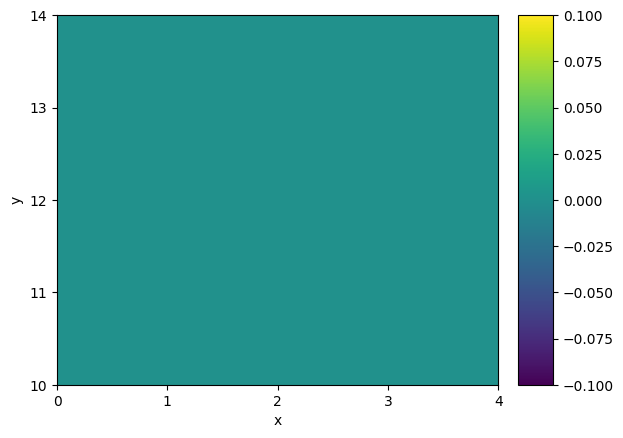

In [76]:
out.show()